# Predicting Insurance Cost

Import required libraries - Numpy, Pandas, 
Visalization - Matplotlib and Seaborn

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### Load the Dataset

In [3]:
data = pd.read_csv("data\datasets_13720_18513_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Check for NULL Values

In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We have 0 missing values.

### Get more info of the datset, Shape, Describe

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.shape

(1338, 7)

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Look for distribution of Charges (Target Variable)

Text(0.5, 1.0, 'Charges Distribution')

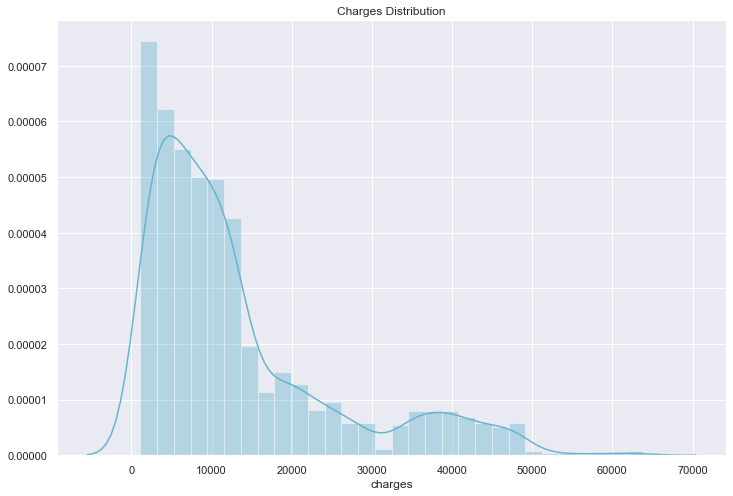

In [10]:
sb.set(style='darkgrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sb.distplot(data['charges'], kde = True, color = 'c')
plt.title('Charges Distribution')

This distribution is right-skewed. To make it closer to normal we can apply natural log

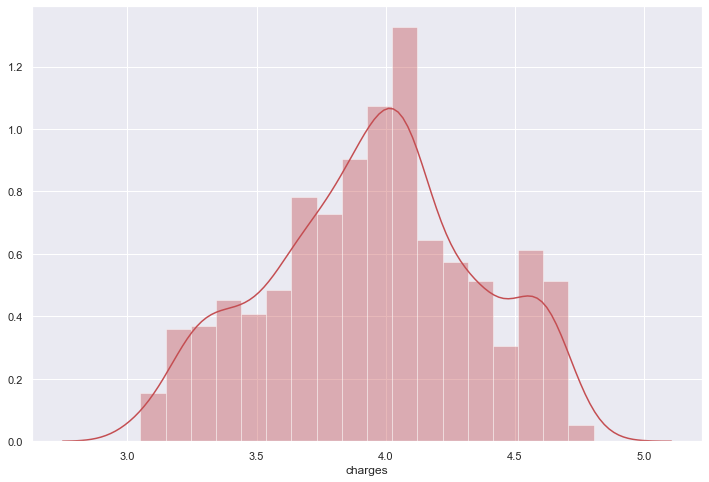

In [11]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sb.distplot(np.log10(data['charges']), kde = True, color = 'r' )

{'whiskers': [<matplotlib.lines.Line2D at 0x26f3e11a548>,
 'caps': [<matplotlib.lines.Line2D at 0x26f3e138fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x26f3e125f88>],
 'medians': [<matplotlib.lines.Line2D at 0x26f3e142ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x26f3e142fc8>],
 'means': []}

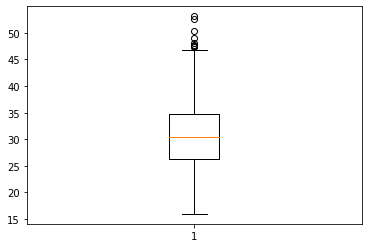

In [9]:
plt.boxplot(data['bmi'])

In [45]:
np.median(data['bmi'])

30.4

In [46]:
import statistics as st

In [47]:
st.mode(data['bmi'])

32.3

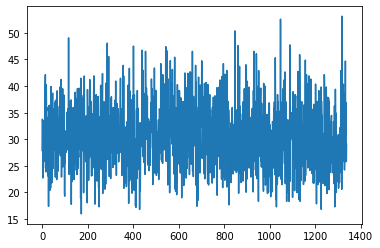

In [13]:
data['bmi'].plot()

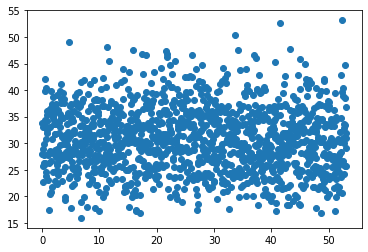

In [14]:
x =np.linspace(0,np.max(data['bmi']),len(data['bmi']))  
plt.scatter(x,data['bmi'])

(array([ 1.,  0.,  2.,  6.,  4.,  3.,  5.,  3.,  4.,  2., 13.,  9.,  8.,
         7., 10., 18., 11., 16., 15., 20., 21., 20., 20., 23., 19., 28.,
        29., 23., 30., 21., 21., 46., 31., 30., 34., 21., 27., 39., 33.,
        37., 30., 27., 31., 34., 23., 27., 35., 28., 26., 27., 21., 15.,
        22., 26., 21., 18., 28., 17.,  8., 19., 11.,  8., 11., 15.,  9.,
        15.,  6.,  7.,  7.,  7.,  6.,  5.,  5.,  3.,  1.,  3.,  2.,  4.,
         1.,  2.,  1.,  2.,  5.,  0.,  2.,  2.,  1.,  0.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([15.96  , 16.3317, 16.7034, 17.0751, 17.4468, 17.8185, 18.1902,
        18.5619, 18.9336, 19.3053, 19.677 , 20.0487, 20.4204, 20.7921,
        21.1638, 21.5355, 21.9072, 22.2789, 22.6506, 23.0223, 23.394 ,
        23.7657, 24.1374, 24.5091, 24.8808, 25.2525, 25.6242, 25.9959,
        26.3676, 26.7393, 27.111 , 27.4827, 27.8544, 28.2261, 28.5978,
        28.9695, 29.3412, 29.7129, 30.0846, 30.4563, 30.828 , 31.1997,
        

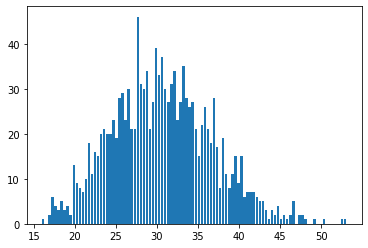

In [15]:
plt.hist(data['bmi'],bins =100,rwidth=0.8)

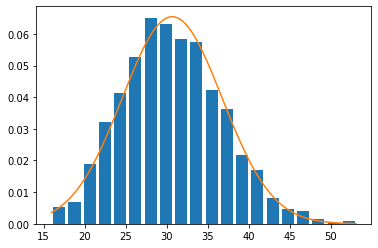

In [16]:
from scipy.stats import norm
plt.hist(data['bmi'],bins=20,rwidth=0.8,density=True)

rng = np.arange(data['bmi'].min(),data['bmi'].max(),0.1)
plt.plot(rng,norm.pdf(rng,data['bmi'].mean(),data['bmi'].std()))

### Drop duplicate rows if any

In [48]:
data['bmi'].mean()

30.663396860986538

In [49]:
data['bmi'].std()

6.098186911679017

In [50]:
upper_limit = data['bmi'].mean()+ 3*data['bmi'].std()
lower_limit = data['bmi'].mean()-3*data['bmi'].std()

In [51]:
upper_limit

48.95795759602359

In [52]:
lower_limit

12.368836125949485

In [53]:
data[(data.bmi>upper_limit)|(data.bmi<lower_limit)]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [56]:
data = data[(data.bmi<upper_limit)&(data.bmi>lower_limit)]

In [57]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [58]:
data.count()

age         1334
sex         1334
bmi         1334
children    1334
smoker      1334
region      1334
charges     1334
dtype: int64

In [24]:
from scipy.stats import iqr

In [30]:
p1,p3 = np.percentile(data['bmi'],[25,75])

In [31]:
p3-p1

8.3975

In [32]:
iqr = iqr(data['bmi'])

In [33]:
ll = p1-1.5*iqr
up = p3+1.5*iqr

In [34]:
ll

13.7

In [36]:
up

47.290000000000006

In [59]:
insurance_data=data.copy()    #Create a copy of the dataset
insurance_data.drop_duplicates(subset=None, inplace=True)

In [60]:
insurance_data.count()

age         1333
sex         1333
bmi         1333
children    1333
smoker      1333
region      1333
charges     1333
dtype: int64

### Check for Junk values if any

In [7]:
#copy of dataset with duplicated removed: insurance_data
for col in insurance_data:
    print(insurance_data[col].value_counts(ascending=False), '\n\n\n')

18    69
19    67
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64 



male      675
female    662
Name: sex, dtype: int64 



32.300    13
28.310     9
31.350     8
30.800     8
30.875     8
          ..
20.100     1
29.545     1
37.900     1
25.520     1
24.090     1
Name: bmi, Length: 548, dtype: int64 



0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64 



no     1063
yes     274
Name: smoker, dtype: int64 



southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64 



8825.08600     1
4399.73100     1
5257.50795     1
1980.07000     1


In [61]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Convert data to categorical type

In [62]:
insurance_data['sex']=insurance_data['sex'].astype('category')
insurance_data['smoker']=insurance_data['smoker'].astype('category')
insurance_data['children']=insurance_data['children'].astype('category')
insurance_data['region']=insurance_data['region'].astype('category')

### Convert categorical variable into dummy/indicator variables.

In [63]:
data_new = pd.get_dummies(insurance_data, drop_first=True)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1333 non-null   int64  
 1   bmi               1333 non-null   float64
 2   charges           1333 non-null   float64
 3   sex_male          1333 non-null   uint8  
 4   children_1        1333 non-null   uint8  
 5   children_2        1333 non-null   uint8  
 6   children_3        1333 non-null   uint8  
 7   children_4        1333 non-null   uint8  
 8   children_5        1333 non-null   uint8  
 9   smoker_yes        1333 non-null   uint8  
 10  region_northwest  1333 non-null   uint8  
 11  region_southeast  1333 non-null   uint8  
 12  region_southwest  1333 non-null   uint8  
dtypes: float64(2), int64(1), uint8(10)
memory usage: 54.7 KB


In [67]:
data_new.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [77]:
data_new.count()

age                 1333
bmi                 1333
charges             1333
sex_male            1333
children_1          1333
children_2          1333
children_3          1333
children_4          1333
children_5          1333
smoker_yes          1333
region_northwest    1333
region_southeast    1333
region_southwest    1333
dtype: int64

### Alternate way of encoding values to descrete type

In [70]:
from sklearn import preprocessing 

In [71]:
label_encoder = preprocessing.LabelEncoder() 

In [72]:
data['sex']= label_encoder.fit_transform(data['sex']) 
data['sex'].unique() 

array([0, 1])

In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


ValueError: x and y must be the same size

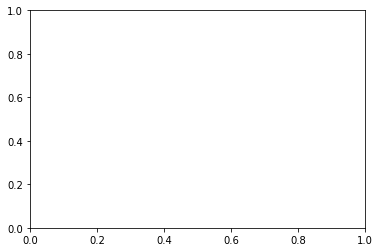

In [62]:
plt.scatter(data.loc['age':'children'],data['charges'])

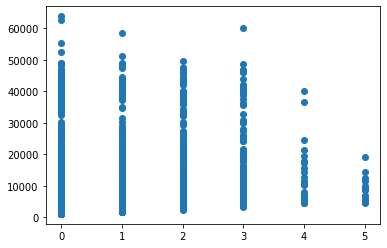

In [23]:
plt.scatter(data['children'],data['charges'])

In [73]:
data['smoker']= label_encoder.fit_transform(data['smoker']) 
  
data['smoker'].unique() 

array([1, 0])

In [74]:
data['region']= label_encoder.fit_transform(data['region']) 
  
data['region'].unique() 

array([3, 2, 1, 0])

In [16]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


### X and y label data

In [68]:
data_new

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


In [80]:
X = data_new[[c for c in data_new.columns if c not in ['charges']]]
y = data_new['charges']
X.head()

,age,bmi,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1,1,0,0,0,0,0,0,1,0
2,28,33.000,1,0,0,1,0,0,0,0,1,0
3,33,22.705,1,0,0,0,0,0,0,1,0,0
4,32,28.880,1,0,0,0,0,0,0,1,0,0


In [81]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [82]:
X.count()

age                 1333
bmi                 1333
sex_male            1333
children_1          1333
children_2          1333
children_3          1333
children_4          1333
children_5          1333
smoker_yes          1333
region_northwest    1333
region_southeast    1333
region_southwest    1333
dtype: int64

In [83]:
y.count()

1333

In [84]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size =0.3, random_state=10)

In [85]:
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
r2_score(y_test,y_predict)

0.7406349314244842

In [86]:
y_predict[:10]

array([10784.69022287,  6314.45734916, 15649.85601404,  8811.38258129,
       24331.68209966, 15191.80808586,  5185.65130865,  8023.47925312,
       11482.92715594,  5262.54386193])

In [87]:
y_test[:10]

299      9249.49520
1083     4076.49700
302     12265.50690
948      6358.77645
1282    14283.45940
770     27941.28758
974      2322.62180
1059     4462.72180
903      8125.78450
306     20177.67113
Name: charges, dtype: float64

# KNN Regressor

In [98]:
from sklearn.neighbors import KNeighborsRegressor

In [99]:
knn = KNeighborsRegressor(20)

In [100]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

In [101]:
knn_ypred = knn.predict(X_test)

In [102]:
knn_ypred[:10]

array([12882.919868 , 12440.410166 , 15404.772733 , 11295.48606  ,
        5168.545539 , 18940.748082 ,  6435.514073 , 16552.2331355,
       16254.3072175,  6281.1424825])

In [103]:
y_test[:10]

299      9249.49520
1083     4076.49700
302     12265.50690
948      6358.77645
1282    14283.45940
770     27941.28758
974      2322.62180
1059     4462.72180
903      8125.78450
306     20177.67113
Name: charges, dtype: float64

In [105]:
r2_score(y_test,knn_ypred)*100

16.420181899894516

## Random forest

In [106]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [107]:
y_pred = regressor.predict(X_test)

In [108]:
y_pred[:10]

array([10172.495826,  4141.798925, 18382.446662,  6799.676575,
       14705.11821 , 13188.377795,  3146.442125,  7259.217446,
        8801.92595 ,  4401.261715])

In [109]:
y_test[:10]

299      9249.49520
1083     4076.49700
302     12265.50690
948      6358.77645
1282    14283.45940
770     27941.28758
974      2322.62180
1059     4462.72180
903      8125.78450
306     20177.67113
Name: charges, dtype: float64

In [111]:
r2_score(y_test,y_pred)

0.8388380117057792

In [121]:
data = pd.read_csv("data\datasets_13720_18513_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [122]:
data['sex'] = data['sex'].astype('category')
data['smoker'] = data['smoker'].astype('category')
data['region'] =  data['region'].astype('category')

In [123]:
newdata = pd.get_dummies(data,drop_first=True)

In [115]:
newdata.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [124]:
y = newdata.pop('charges')

In [125]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [127]:
X = newdata

In [128]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=10)

In [130]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [131]:
y_pred = regressor.predict(X_test)

In [132]:
y_pred[:10]

array([ 6666.86951 ,  5087.67719 , 26951.202222, 13229.623455,
        3345.34519 ,  6704.392315,  9005.892385, 19749.806481,
        8218.74251 , 19957.76027 ])

In [133]:
y_test[:10]

7        7281.50560
999      5267.81815
1209    12347.17200
491     24513.09126
625      3736.46470
228      7358.17565
425      9788.86590
261     17085.26760
498      8211.10020
896     19798.05455
Name: charges, dtype: float64

In [134]:
r2_score(y_test,y_pred)

0.7996441691233975

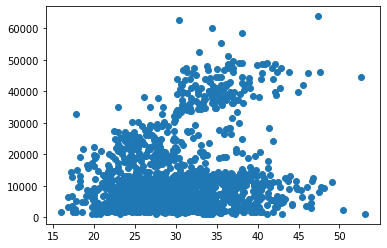

In [135]:
plt.scatter(data['bmi'],data['charges'])

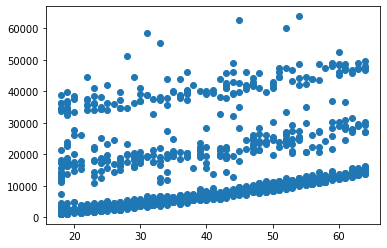

In [136]:
plt.scatter(data['age'],data['charges'])

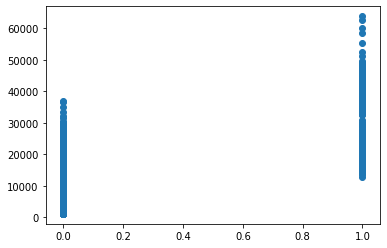

In [138]:
plt.scatter(newdata['smoker_yes'],data['charges'])

# Analysis II

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

D:\Python\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Python\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = pd.read_csv("data\datasets_13720_18513_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Dropping least important feature of the dataset
dataset = data.drop('region', axis = 1)

In [8]:
dataset.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['sex'] = le.fit_transform(dataset['sex'])
dataset['smoker'] = le.fit_transform(dataset['smoker'])

In [23]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,5]
print(X.shape)
print(y.shape)

(1338, 5)
(1338,)


In [10]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [11]:
X.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [13]:
from sklearn.preprocessing import StandardScaler# creating a standard scaler
sc = StandardScaler()       # feeding independents sets into the standard scaler
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [21]:
# Linear Regression
from sklearn.linear_model import LinearRegression 
# creating the Linear Regression model
lR = LinearRegression()
# feeding the training data to the model
lR.fit(X_train, y_train)
y_pred_lR = lR.predict(X_test)
lR.score(X_train,y_train)*100

74.6371600231669

## SVR


In [20]:
from sklearn.svm import SVR
# creating the model
svr = SVR()

# feeding the training data to the model
svr.fit(X_train, y_train)

# predicting the test set results
y_pred_svr = svr.predict(X_test)

svr.score(X_train,y_train)*100

-9.36199496042802

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)

regressor.score(X_train,y_train)*100

96.41157425797756

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
RF=pd.DataFrame({'Predict': y_pred, 'Actual': y_test}).reset_index()
RF['predict-Actual']=RF['Predict']-RF['Actual']

,index,Predict,Actual,predict-Actual
0,338,41466.894865,41919.0970,-452.202135
1,620,4248.396400,3659.3460,589.050400
2,965,4785.270890,4746.3440,38.926890
3,128,16936.613755,32734.1863,-15797.572545
4,329,14578.264427,9144.5650,5433.699427


In [27]:
RF.head(20)

,index,Predict,Actual,predict-Actual
0,338,41466.894865,41919.09700,-452.202135
1,620,4248.396400,3659.34600,589.050400
2,965,4785.270890,4746.34400,38.926890
3,128,16936.613755,32734.18630,-15797.572545
4,329,14578.264427,9144.56500,5433.699427
5,440,4399.352430,4738.26820,-338.915770
6,1215,1274.141350,12890.05765,-11615.916300
7,387,9917.636805,30284.64294,-20367.006135
8,1037,49169.006081,39725.51805,9443.488031
9,1015,11994.868445,12124.99240,-130.123955
